In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
%matplotlib inline

In [2]:
#df=sb.load_dataset('titanic')
df=pd.read_csv('./titanic_train.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.groupby('Survived').count().iloc[:,1]

Survived
0    549
1    342
Name: Pclass, dtype: int64

In [5]:
df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [6]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [7]:
df.agg('count')

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df.agg(['count','max'])

PassengerId  Survived  Pclass                         Name   Sex  \
count          891       891     891                          891   891   
max            891         1       3  van Melkebeke, Mr. Philemon  male   

         Age  SibSp  Parch     Ticket      Fare  Cabin  Embarked  
count  714.0    891    891        891  891.0000  204.0     889.0  
max     80.0      8      6  WE/P 5735  512.3292    NaN       NaN

In [9]:

df.agg({'Name':'count', 'Fare':'sum' , 'Age':'max'})

Name      891.0000
Fare    28693.9493
Age        80.0000
dtype: float64

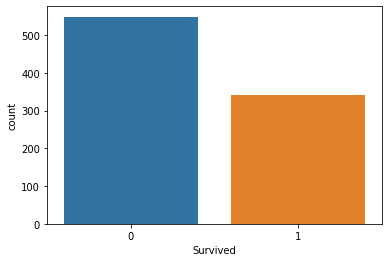

In [10]:
sb.countplot(x='Survived' ,data=df)

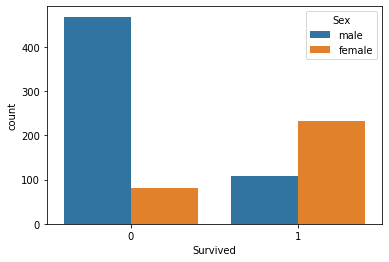

In [11]:
sb.countplot(x='Survived',hue='Sex' ,data=df)

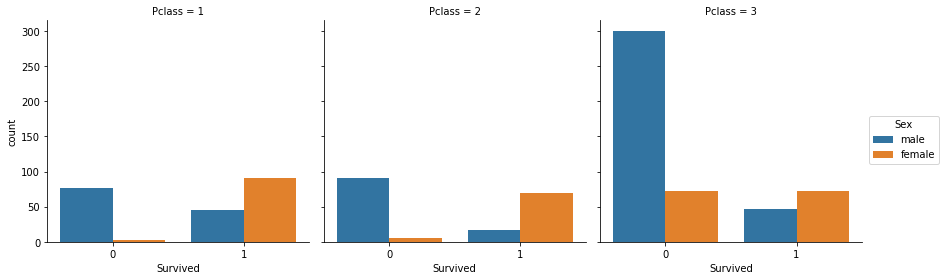

In [12]:
sb.factorplot(x='Survived',hue='Sex',data=df,col='Pclass',kind='count')

/Applications/anaconda/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


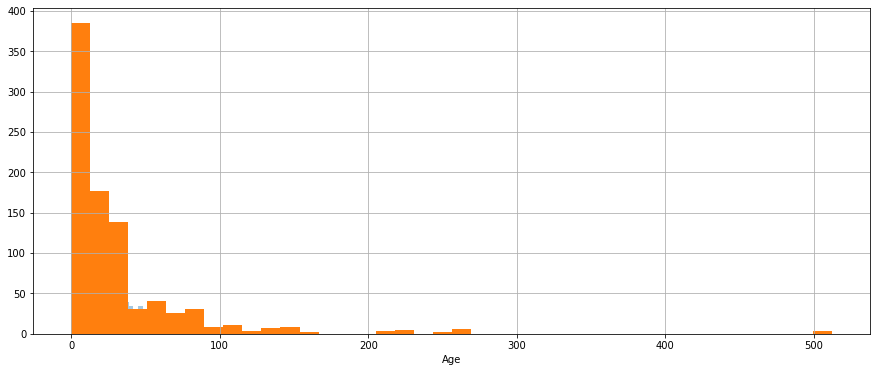

In [13]:
#sb.distplot(df['Age'])
sb.distplot(df['Age'].dropna(),bins=25,kde=False)
#df['Age'].hist(bins=25)
df['Fare'].hist(bins=40,figsize=(15,6))

/Applications/anaconda/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


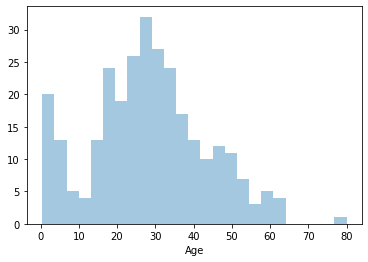

In [14]:
sb.distplot(df[df['Survived']==1]['Age'].dropna(),bins=25,kde=False)

In [15]:
#!pip install cufflinks
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
df['Age'].iplot(kind='hist',bins=30,color='green')

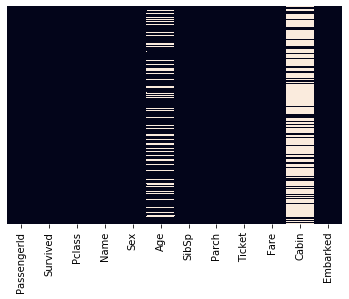

In [18]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

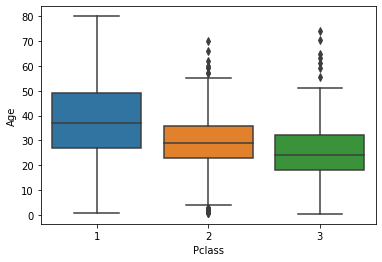

In [19]:
sb.boxplot(y='Age',x='Pclass', data=df)

In [20]:
df[(df['Pclass']==2) & (df['Age']> 57)]

PassengerId  Survived  Pclass                               Name   Sex  \
33            34         0       2              Wheadon, Mr. Edward H  male   
232          233         0       2          Sjostedt, Mr. Ernst Adolf  male   
570          571         1       2                 Harris, Mr. George  male   
672          673         0       2        Mitchell, Mr. Henry Michael  male   
684          685         0       2  Brown, Mr. Thomas William Solomon  male   

      Age  SibSp  Parch       Ticket  Fare Cabin Embarked  
33   66.0      0      0   C.A. 24579  10.5   NaN        S  
232  59.0      0      0       237442  13.5   NaN        S  
570  62.0      0      0  S.W./PP 752  10.5   NaN        S  
672  70.0      0      0   C.A. 24580  10.5   NaN        S  
684  60.0      1      1        29750  39.0   NaN        S

In [21]:
for k,v in df.iterrows():
    ls=[0,37,29,24]
    if np.isnan(v.Age):
            df.loc[k,'Age'] = ls[v.Pclass]
        

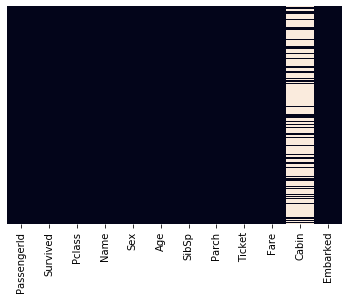

In [22]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [23]:
df.drop('Cabin',axis=1,inplace=True)

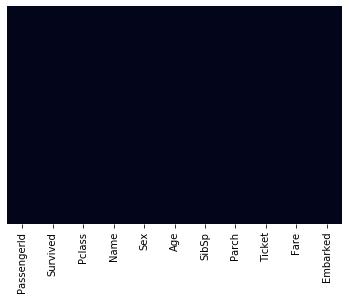

In [24]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [25]:
df.dropna(inplace=True)

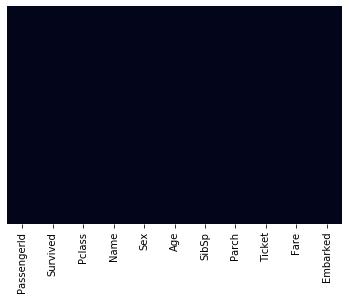

In [26]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

Creating a dummy variables (indicators)

In [27]:
df['Sex']=(pd.get_dummies(df['Sex'],drop_first=True)).astype(np.int64)

or simple way:

In [28]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S

In [29]:
df3 = pd.get_dummies(df['Pclass'],drop_first=True)

In [30]:
df['Sex'].replace('male',0,inplace=True)
df['Sex'].replace('female',1,inplace=True)

In [31]:
emb=pd.get_dummies(df['Embarked'],drop_first=True)

In [32]:
emb.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [33]:
df = pd.concat([df,emb],axis=1)

In [34]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  Q  S  
0         A/5 21171   7.2500        S  0  1  
1          PC 17599  71.2833        C  0  0  
2  STON/O2. 3101282   7.9250        S  0  1  
3            113803  53.1000        S  0  1  
4            373450   8.0500        S  0  1

In [35]:
df.drop(['PassengerId','Embarked','Ticket','Name'],axis=1,inplace=True)

In [36]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Q  S
0         0       3    1  22.0      1      0   7.2500  0  1
1         1       1    0  38.0      1      0  71.2833  0  0
2         1       3    0  26.0      0      0   7.9250  0  1
3         1       1    0  35.0      1      0  53.1000  0  1
4         0       3    1  35.0      0      0   8.0500  0  1

the model

In [37]:
import sklearn.model_selection as mods
X_train, X_test, y_train, y_test = mods.train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [38]:
import sklearn.linear_model as sklin



In [39]:
model=sklin.LogisticRegression()

In [40]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predictions=model.predict(X_test)

In [42]:
s1=(predictions != y_test)

In [43]:
np.mean(predictions != y_test)

0.19101123595505617

convert category to dummy variables


In [44]:
df = pd.concat([df,pd.get_dummies(df['Pclass'],drop_first=True)],axis=1)

In [45]:
df.drop('Pclass',axis=1,inplace=True)

In [46]:
y_test.count()

267

In [47]:
import sklearn.metrics as skmet

In [48]:
cmat = skmet.confusion_matrix(y_test,predictions)

# TN       FP
# FN       TP

In [49]:
cmat

array([[148,  15],
       [ 36,  68]])

precision - Actual yes / Total perdicted yes - TP / (FP + TP)

In [50]:
pre = cmat[1,1]/(cmat[0,1]+cmat[1,1])
pre

0.8192771084337349

recall - TP / (FN + TP)

In [51]:
recall = cmat[1,1]/(cmat[1,0]+ cmat[1,1])
recall

0.6538461538461539

In [52]:
f1_score = 2*((pre*recall)/(pre + recall))
f1_score

0.7272727272727274

In [53]:
c1=skmet.classification_report(y_test,predictions)

In [54]:
print(c1)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [56]:
model.coef_

array([[-0.78495492, -2.32107218, -0.0258638 , -0.21650016, -0.08529259,
         0.00468565, -0.01528129, -0.16977447]])